In [1]:
#! pip install climetlab_s2s_ai_competition --quiet

In [2]:
import climetlab as cml 

module 'Magics' has no attribute 'strict_mode'


In [3]:
import climetlab_s2s_ai_competition
print(f'Climetlab version : {cml.__version__}')
print(f'Climetlab-s2s-ai-competition plugin version : {climetlab_s2s_ai_competition.__version__}')

Climetlab version : 0.2.2
Climetlab-s2s-ai-competition plugin version : 0.2.2


# Using Netcdf data

## Version 0.1.20 : with coordinates (forecast_time,step) + time as another field.

In [4]:
version = '0.1.20'

Let us download netcdf file for total precipitation (tp) for one date :

In [5]:
cmlds = cml.load_dataset("s2s-ai-competition-reference-set",
                         date=["20200102"],
                         parameter='tp',
                         version=version,
                         format='netcdf')

By downloading data from this dataset, you agree to the their terms: Attribution 4.0 International(CC BY 4.0). If you do not agree with such terms, do not download the data. For more information, please visit https://www.ecmwf.int/en/terms-use and https://apps.ecmwf.int/datasets/data/s2s/licence/.


This climetlab dataset can be used as a xarray.Dataset or as a pandas.DataFrame :

In [6]:
cmlds.to_xarray()

<xarray.Dataset>
Dimensions:        (forecast_time: 1, latitude: 121, longitude: 240, realization: 51, step: 47)
Coordinates:
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
Data variables:
    time           (forecast_time, step) datetime64[ns] ...
    tp             (realization, forecast_time, step, latitude, longitude) float32 ...

In [7]:
cmlds.to_xarray().to_dataframe() # TODO : implement to_pandas() ?

time         tp
forecast_time latitude longitude realization step                         
2020-01-02     90.0    0.0       0           0 days  2020-01-02   0.000000
                                             1 days  2020-01-03   0.050476
                                             2 days  2020-01-04   0.529724
                                             3 days  2020-01-05   0.983826
                                             4 days  2020-01-06   1.488342
...                                                         ...        ...
              -90.0    358.5     50          42 days 2020-02-13  11.477844
                                             43 days 2020-02-14  11.503052
                                             44 days 2020-02-15  11.528320
                                             45 days 2020-02-16  11.528320
                                             46 days 2020-02-17  11.528320

[69608880 rows x 2 columns]

We can get the temperature parameter (2t) in a similar fashion. The "date" and "parameter" arguments also accept lists of values.

In [8]:
cml.load_dataset("s2s-ai-competition-reference-set", date="20200102", parameter='2t', version=version, format='netcdf').to_xarray()

<xarray.Dataset>
Dimensions:        (forecast_time: 1, latitude: 121, longitude: 240, realization: 51, step: 46)
Coordinates:
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02
  * step           (step) timedelta64[ns] 1 days 2 days ... 45 days 46 days
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
Data variables:
    time           (forecast_time, step) datetime64[ns] ...
    t2m            (realization, forecast_time, step, latitude, longitude) float32 ...

In [9]:
import numpy as np
dates = [np.datetime64('2020-01-02'),'2020-01-09','20200116']
cml.load_dataset("s2s-ai-competition-reference-set", date=dates, parameter=['2t','tp'], version=version, format='netcdf').to_xarray()

<xarray.Dataset>
Dimensions:        (forecast_time: 3, latitude: 121, longitude: 240, realization: 51, step: 47)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02 ... 2020-01-16
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
Data variables:
    time           (forecast_time, step) datetime64[ns] 2020-01-02 ... 2020-0...
    t2m            (realization, forecast_time, step, latitude, longitude) float32 ...
    tp             (realization, forecast_time, step, latitude, longitude) float32 ...

In [10]:
# TODO
#import pandas as pd
#cml.load_dataset("s2s-ai-competition-reference-set", date=pd.date_range(start="2020-01-02", end="2020-01-31", freq="w-thu"), parameter='2t', version=version, format='netcdf').to_xarray()

Hindcast data is available by adding the appropriate parameter : hindcast = True

In [11]:
ds = cml.load_dataset("s2s-ai-competition-reference-set", hindcast=True, date="20200102", parameter=['2t','tp'], version=version, format='netcdf').to_xarray()

In [12]:
ds

<xarray.Dataset>
Dimensions:        (forecast_time: 20, latitude: 121, longitude: 240, realization: 11, step: 47)
Coordinates:
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
  * realization    (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * forecast_time  (forecast_time) datetime64[ns] 2000-01-02 ... 2019-01-02
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
Data variables:
    time           (forecast_time, step) datetime64[ns] 2000-01-02 ... 2019-0...
    t2m            (realization, forecast_time, step, latitude, longitude) float32 ...
    tp             (realization, forecast_time, step, latitude, longitude) float32 ...

### Computing average and plotting

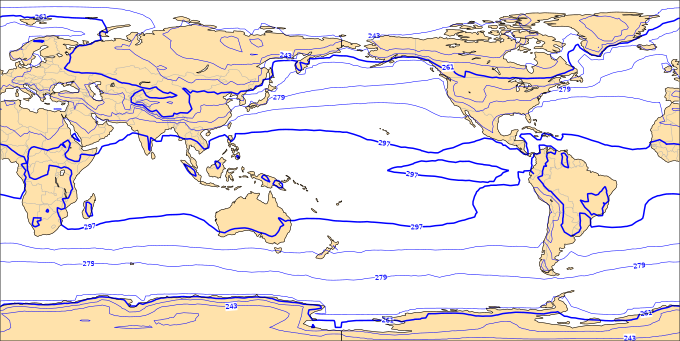

In [13]:
mean1 = ds.mean(dim="step")
cml.plot_map(mean1.isel(forecast_time=0, realization=0))


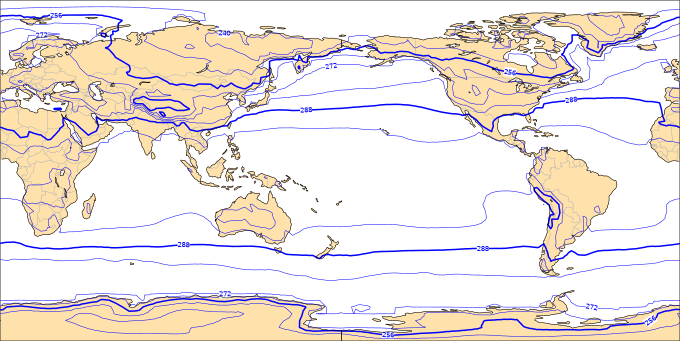

In [14]:
mean2 = ds.mean(dim="forecast_time")
cml.plot_map(mean2.isel(step=20, realization=0))


In [15]:
#mean3 = ds.mean(dim="time")
#cml.plot_map(mean3.isel(forecast_time=20, realization=0))

## Version 0.1.6 : with coordinates (forecast_time, time)

In [16]:
version = '0.1.6'

Let us download netcdf file for total precipitation (tp) for one date :

In [17]:
cmlds = cml.load_dataset("s2s-ai-competition-reference-set", date="20200102", parameter=['tp', '2t'], version=version, format='netcdf')

This climetlab dataset can be used as a xarray.Dataset :

In [18]:
cmlds.to_xarray()

<xarray.Dataset>
Dimensions:        (forecast_time: 1, latitude: 121, longitude: 240, realization: 51, time: 47)
Coordinates:
  * time           (time) datetime64[ns] 2020-01-02 2020-01-03 ... 2020-02-17
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
Data variables:
    tp             (realization, forecast_time, time, latitude, longitude) float32 ...
    t2m            (realization, forecast_time, time, latitude, longitude) float32 ...

In [19]:
# cmlds.to_pandas() # TODO : implement to_pandas()

Hindcast data is **not** available by adding the appropriate parameter : hindcast = True

In [20]:
#ds = cml.load_dataset("s2s-ai-competition-reference-set", hindcast=True, date="20200102", parameter=['2t','tp'], version=version, format='netcdf').to_xarray()

### Computing average and plotting

In [21]:
ds = cml.load_dataset("s2s-ai-competition-reference-set", date=["20200102", "20200109"], parameter=['2t','tp'], version=version, format='netcdf').to_xarray()
ds

<xarray.Dataset>
Dimensions:        (forecast_time: 2, latitude: 121, longitude: 240, realization: 51, time: 54)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02 2020-01-09
  * time           (time) datetime64[ns] 2020-01-02 2020-01-03 ... 2020-02-24
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
Data variables:
    t2m            (realization, forecast_time, time, latitude, longitude) float32 ...
    tp             (realization, forecast_time, time, latitude, longitude) float32 ...

In [22]:
#mean1 = ds.mean(dim="step")
#cml.plot_map(mean1.isel(forecast_time=0, realization=0))

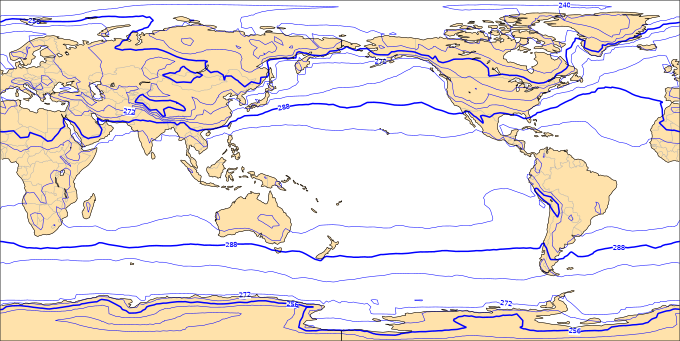

In [23]:
mean2 = ds.mean(dim="forecast_time")
cml.plot_map(mean2.isel(time=20, realization=0))

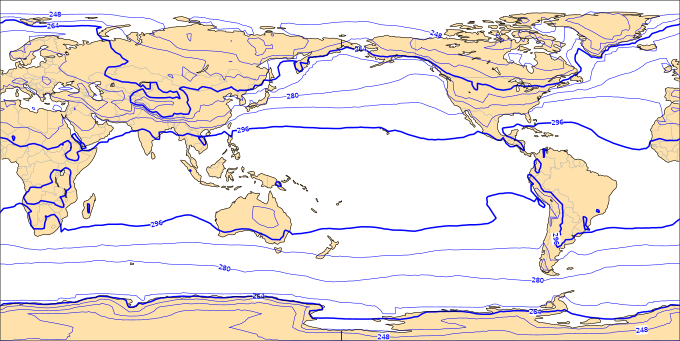

In [24]:
mean3 = ds.mean(dim="time")
cml.plot_map(mean3.isel(forecast_time=1, realization=0))

# Read Grib data

In [25]:
cmlds = cml.load_dataset("s2s-ai-competition-reference-set", date=["20200102"], parameter='2t', version='1.0.0', format='grib')
cmlds

Home page,-
Documentation,-
Citation,-
Licence,https://apps.ecmwf.int/datasets/data/s2s/licence/


Grib files have been dowloaded. Iterate through them with :

In [26]:
for filename in cmlds:
    print(filename)

GribField(2t,2,20200102,0,0-24,0)
GribField(2t,2,20200102,0,24-48,0)
GribField(2t,2,20200102,0,48-72,0)
GribField(2t,2,20200102,0,72-96,0)
GribField(2t,2,20200102,0,96-120,0)
GribField(2t,2,20200102,0,120-144,0)
GribField(2t,2,20200102,0,144-168,0)
GribField(2t,2,20200102,0,168-192,0)
GribField(2t,2,20200102,0,192-216,0)
GribField(2t,2,20200102,0,216-240,0)
GribField(2t,2,20200102,0,240-264,0)
GribField(2t,2,20200102,0,264-288,0)
GribField(2t,2,20200102,0,288-312,0)
GribField(2t,2,20200102,0,312-336,0)
GribField(2t,2,20200102,0,336-360,0)
GribField(2t,2,20200102,0,360-384,0)
GribField(2t,2,20200102,0,384-408,0)
GribField(2t,2,20200102,0,408-432,0)
GribField(2t,2,20200102,0,432-456,0)
GribField(2t,2,20200102,0,456-480,0)
GribField(2t,2,20200102,0,480-504,0)
GribField(2t,2,20200102,0,504-528,0)
GribField(2t,2,20200102,0,528-552,0)
GribField(2t,2,20200102,0,552-576,0)
GribField(2t,2,20200102,0,576-600,0)
GribField(2t,2,20200102,0,600-624,0)
GribField(2t,2,20200102,0,624-648,0)
GribField(2

GribField(2t,2,20200102,0,96-120,32)
GribField(2t,2,20200102,0,96-120,33)
GribField(2t,2,20200102,0,96-120,34)
GribField(2t,2,20200102,0,96-120,35)
GribField(2t,2,20200102,0,96-120,36)
GribField(2t,2,20200102,0,96-120,37)
GribField(2t,2,20200102,0,96-120,38)
GribField(2t,2,20200102,0,96-120,39)
GribField(2t,2,20200102,0,96-120,40)
GribField(2t,2,20200102,0,96-120,41)
GribField(2t,2,20200102,0,96-120,42)
GribField(2t,2,20200102,0,96-120,43)
GribField(2t,2,20200102,0,96-120,44)
GribField(2t,2,20200102,0,96-120,45)
GribField(2t,2,20200102,0,96-120,46)
GribField(2t,2,20200102,0,96-120,47)
GribField(2t,2,20200102,0,96-120,48)
GribField(2t,2,20200102,0,96-120,49)
GribField(2t,2,20200102,0,96-120,50)
GribField(2t,2,20200102,0,120-144,1)
GribField(2t,2,20200102,0,120-144,2)
GribField(2t,2,20200102,0,120-144,3)
GribField(2t,2,20200102,0,120-144,4)
GribField(2t,2,20200102,0,120-144,5)
GribField(2t,2,20200102,0,120-144,6)
GribField(2t,2,20200102,0,120-144,7)
GribField(2t,2,20200102,0,120-144,8)
G

GribField(2t,2,20200102,0,240-264,9)
GribField(2t,2,20200102,0,240-264,10)
GribField(2t,2,20200102,0,240-264,11)
GribField(2t,2,20200102,0,240-264,12)
GribField(2t,2,20200102,0,240-264,13)
GribField(2t,2,20200102,0,240-264,14)
GribField(2t,2,20200102,0,240-264,15)
GribField(2t,2,20200102,0,240-264,16)
GribField(2t,2,20200102,0,240-264,17)
GribField(2t,2,20200102,0,240-264,18)
GribField(2t,2,20200102,0,240-264,19)
GribField(2t,2,20200102,0,240-264,20)
GribField(2t,2,20200102,0,240-264,21)
GribField(2t,2,20200102,0,240-264,22)
GribField(2t,2,20200102,0,240-264,23)
GribField(2t,2,20200102,0,240-264,24)
GribField(2t,2,20200102,0,240-264,25)
GribField(2t,2,20200102,0,240-264,26)
GribField(2t,2,20200102,0,240-264,27)
GribField(2t,2,20200102,0,240-264,28)
GribField(2t,2,20200102,0,240-264,29)
GribField(2t,2,20200102,0,240-264,30)
GribField(2t,2,20200102,0,240-264,31)
GribField(2t,2,20200102,0,240-264,32)
GribField(2t,2,20200102,0,240-264,33)
GribField(2t,2,20200102,0,240-264,34)
GribField(2t,

GribField(2t,2,20200102,0,360-384,37)
GribField(2t,2,20200102,0,360-384,38)
GribField(2t,2,20200102,0,360-384,39)
GribField(2t,2,20200102,0,360-384,40)
GribField(2t,2,20200102,0,360-384,41)
GribField(2t,2,20200102,0,360-384,42)
GribField(2t,2,20200102,0,360-384,43)
GribField(2t,2,20200102,0,360-384,44)
GribField(2t,2,20200102,0,360-384,45)
GribField(2t,2,20200102,0,360-384,46)
GribField(2t,2,20200102,0,360-384,47)
GribField(2t,2,20200102,0,360-384,48)
GribField(2t,2,20200102,0,360-384,49)
GribField(2t,2,20200102,0,360-384,50)
GribField(2t,2,20200102,0,384-408,1)
GribField(2t,2,20200102,0,384-408,2)
GribField(2t,2,20200102,0,384-408,3)
GribField(2t,2,20200102,0,384-408,4)
GribField(2t,2,20200102,0,384-408,5)
GribField(2t,2,20200102,0,384-408,6)
GribField(2t,2,20200102,0,384-408,7)
GribField(2t,2,20200102,0,384-408,8)
GribField(2t,2,20200102,0,384-408,9)
GribField(2t,2,20200102,0,384-408,10)
GribField(2t,2,20200102,0,384-408,11)
GribField(2t,2,20200102,0,384-408,12)
GribField(2t,2,202001

GribField(2t,2,20200102,0,504-528,14)
GribField(2t,2,20200102,0,504-528,15)
GribField(2t,2,20200102,0,504-528,16)
GribField(2t,2,20200102,0,504-528,17)
GribField(2t,2,20200102,0,504-528,18)
GribField(2t,2,20200102,0,504-528,19)
GribField(2t,2,20200102,0,504-528,20)
GribField(2t,2,20200102,0,504-528,21)
GribField(2t,2,20200102,0,504-528,22)
GribField(2t,2,20200102,0,504-528,23)
GribField(2t,2,20200102,0,504-528,24)
GribField(2t,2,20200102,0,504-528,25)
GribField(2t,2,20200102,0,504-528,26)
GribField(2t,2,20200102,0,504-528,27)
GribField(2t,2,20200102,0,504-528,28)
GribField(2t,2,20200102,0,504-528,29)
GribField(2t,2,20200102,0,504-528,30)
GribField(2t,2,20200102,0,504-528,31)
GribField(2t,2,20200102,0,504-528,32)
GribField(2t,2,20200102,0,504-528,33)
GribField(2t,2,20200102,0,504-528,34)
GribField(2t,2,20200102,0,504-528,35)
GribField(2t,2,20200102,0,504-528,36)
GribField(2t,2,20200102,0,504-528,37)
GribField(2t,2,20200102,0,504-528,38)
GribField(2t,2,20200102,0,504-528,39)
GribField(2t

GribField(2t,2,20200102,0,624-648,43)
GribField(2t,2,20200102,0,624-648,44)
GribField(2t,2,20200102,0,624-648,45)
GribField(2t,2,20200102,0,624-648,46)
GribField(2t,2,20200102,0,624-648,47)
GribField(2t,2,20200102,0,624-648,48)
GribField(2t,2,20200102,0,624-648,49)
GribField(2t,2,20200102,0,624-648,50)
GribField(2t,2,20200102,0,648-672,1)
GribField(2t,2,20200102,0,648-672,2)
GribField(2t,2,20200102,0,648-672,3)
GribField(2t,2,20200102,0,648-672,4)
GribField(2t,2,20200102,0,648-672,5)
GribField(2t,2,20200102,0,648-672,6)
GribField(2t,2,20200102,0,648-672,7)
GribField(2t,2,20200102,0,648-672,8)
GribField(2t,2,20200102,0,648-672,9)
GribField(2t,2,20200102,0,648-672,10)
GribField(2t,2,20200102,0,648-672,11)
GribField(2t,2,20200102,0,648-672,12)
GribField(2t,2,20200102,0,648-672,13)
GribField(2t,2,20200102,0,648-672,14)
GribField(2t,2,20200102,0,648-672,15)
GribField(2t,2,20200102,0,648-672,16)
GribField(2t,2,20200102,0,648-672,17)
GribField(2t,2,20200102,0,648-672,18)
GribField(2t,2,202001

GribField(2t,2,20200102,0,768-792,14)
GribField(2t,2,20200102,0,768-792,15)
GribField(2t,2,20200102,0,768-792,16)
GribField(2t,2,20200102,0,768-792,17)
GribField(2t,2,20200102,0,768-792,18)
GribField(2t,2,20200102,0,768-792,19)
GribField(2t,2,20200102,0,768-792,20)
GribField(2t,2,20200102,0,768-792,21)
GribField(2t,2,20200102,0,768-792,22)
GribField(2t,2,20200102,0,768-792,23)
GribField(2t,2,20200102,0,768-792,24)
GribField(2t,2,20200102,0,768-792,25)
GribField(2t,2,20200102,0,768-792,26)
GribField(2t,2,20200102,0,768-792,27)
GribField(2t,2,20200102,0,768-792,28)
GribField(2t,2,20200102,0,768-792,29)
GribField(2t,2,20200102,0,768-792,30)
GribField(2t,2,20200102,0,768-792,31)
GribField(2t,2,20200102,0,768-792,32)
GribField(2t,2,20200102,0,768-792,33)
GribField(2t,2,20200102,0,768-792,34)
GribField(2t,2,20200102,0,768-792,35)
GribField(2t,2,20200102,0,768-792,36)
GribField(2t,2,20200102,0,768-792,37)
GribField(2t,2,20200102,0,768-792,38)
GribField(2t,2,20200102,0,768-792,39)
GribField(2t

GribField(2t,2,20200102,0,888-912,50)
GribField(2t,2,20200102,0,912-936,1)
GribField(2t,2,20200102,0,912-936,2)
GribField(2t,2,20200102,0,912-936,3)
GribField(2t,2,20200102,0,912-936,4)
GribField(2t,2,20200102,0,912-936,5)
GribField(2t,2,20200102,0,912-936,6)
GribField(2t,2,20200102,0,912-936,7)
GribField(2t,2,20200102,0,912-936,8)
GribField(2t,2,20200102,0,912-936,9)
GribField(2t,2,20200102,0,912-936,10)
GribField(2t,2,20200102,0,912-936,11)
GribField(2t,2,20200102,0,912-936,12)
GribField(2t,2,20200102,0,912-936,13)
GribField(2t,2,20200102,0,912-936,14)
GribField(2t,2,20200102,0,912-936,15)
GribField(2t,2,20200102,0,912-936,16)
GribField(2t,2,20200102,0,912-936,17)
GribField(2t,2,20200102,0,912-936,18)
GribField(2t,2,20200102,0,912-936,19)
GribField(2t,2,20200102,0,912-936,20)
GribField(2t,2,20200102,0,912-936,21)
GribField(2t,2,20200102,0,912-936,22)
GribField(2t,2,20200102,0,912-936,23)
GribField(2t,2,20200102,0,912-936,24)
GribField(2t,2,20200102,0,912-936,25)
GribField(2t,2,202001

GribField(2t,2,20200102,0,1032-1056,36)
GribField(2t,2,20200102,0,1032-1056,37)
GribField(2t,2,20200102,0,1032-1056,38)
GribField(2t,2,20200102,0,1032-1056,39)
GribField(2t,2,20200102,0,1032-1056,40)
GribField(2t,2,20200102,0,1032-1056,41)
GribField(2t,2,20200102,0,1032-1056,42)
GribField(2t,2,20200102,0,1032-1056,43)
GribField(2t,2,20200102,0,1032-1056,44)
GribField(2t,2,20200102,0,1032-1056,45)
GribField(2t,2,20200102,0,1032-1056,46)
GribField(2t,2,20200102,0,1032-1056,47)
GribField(2t,2,20200102,0,1032-1056,48)
GribField(2t,2,20200102,0,1032-1056,49)
GribField(2t,2,20200102,0,1032-1056,50)
GribField(2t,2,20200102,0,1056-1080,1)
GribField(2t,2,20200102,0,1056-1080,2)
GribField(2t,2,20200102,0,1056-1080,3)
GribField(2t,2,20200102,0,1056-1080,4)
GribField(2t,2,20200102,0,1056-1080,5)
GribField(2t,2,20200102,0,1056-1080,6)
GribField(2t,2,20200102,0,1056-1080,7)
GribField(2t,2,20200102,0,1056-1080,8)
GribField(2t,2,20200102,0,1056-1080,9)
GribField(2t,2,20200102,0,1056-1080,10)
GribField

Or convert to xarray :

In [27]:
cmlds.to_xarray()

<xarray.Dataset>
Dimensions:            (latitude: 121, longitude: 240, number: 51, step: 46)
Coordinates:
  * number             (number) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
    time               datetime64[ns] 2020-01-02
  * step               (step) timedelta64[ns] 1 days 2 days ... 45 days 46 days
    heightAboveGround  int64 2
  * latitude           (latitude) float64 90.0 88.5 87.0 ... -87.0 -88.5 -90.0
  * longitude          (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    valid_time         (step) datetime64[ns] ...
Data variables:
    t2m                (number, step, latitude, longitude) float32 ...